In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.misc as sp
from PIL import Image, ImageEnhance, ImageOps
%matplotlib inline

In [304]:
class neuralNetwork:
    def __init__(self, inputSize, hiddenSize, outputSize, learningRate, weightsIH=False, weightsHO=False):
        self.inpSize = inputSize
        self.outSize = outputSize
        self.hidSize = hiddenSize
        self.lr = learningRate

        if not weightsIH:
            self.weightsIH = np.random.normal(0.0, pow(self.inpSize, -0.5), (self.hidSize, self.inpSize))
        else:
            self.weightsIH = weightsIH

        if not weightsHO:
            self.weightsHO = np.random.normal(0.0, pow(self.hidSize, -0.5), (self.outSize, self.hidSize))
        else:
            self.weightsHO = weightsHO

    def train(self, x, y):
        x = np.array(x, ndmin=2).T
        y = np.array(y, ndmin=2).T
        
        hiddenOut = self.activation(self.weightsIH @ x)

        Output = self.activation(self.weightsHO @ hiddenOut)

        errors = y - Output

        self.weightsHO = self.weightsHO + self.lr * ((errors * Output * (1 - Output)) @ hiddenOut.T)

        hErrors = self.weightsHO.T @ errors

        self.weightsIH = self.weightsIH + self.lr * ((hErrors * hiddenOut * (1 - hiddenOut)) @ x.T)



    def predict(self, x):
        x = np.array(x, ndmin=2).T
        return self.activation(self.weightsHO @ self.activation(self.weightsIH @ x))  

    def activation(self, z):
        return 1/(1+2.718282**-z)
    
    def invActivation(self, z):
        return np.log(z/(1-z))
    
    def backquery(self, y):
        y = np.array(y, ndmin=2).T

        outSums = self.invActivation(y)
        hidOut = self.weightsHO.T @ outSums
        hidOut -= np.min(hidOut)
        hidOut /= np.max(hidOut)
        hidOut *= 0.98
        hidOut += 0.01

        hiddenSums = self.invActivation(hidOut)
        inp = self.weightsIH.T @ hiddenSums
        inp -= np.min(inp)
        inp /= np.max(inp)
        inp *= 0.98
        inp += 0.01

        return inp


In [305]:
def convert(file):
    out = []
    for el in file:
        el = el.replace('[','').replace(']','')
        out.append(np.fromstring(el, float, sep=',  '))
    return out


In [306]:
text = open("mnistBrains.txt", 'r').read().replace('\n','').replace('       ','').replace(')','').replace('(','')
text = text.split('end')
w0 = text[0].split('array')
w1 = text[1].split('array')
w0.pop(0)
w1.pop(0)
w0 = convert(w0)
w1 = convert(w1)

In [307]:
brain = neuralNetwork(len(w0[0]), len(w0), len(w1), 0.1, w0, w1)

In [308]:
image = Image.open('images/four.png').convert('L')

In [309]:
image = ImageOps.invert(image)
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(7)

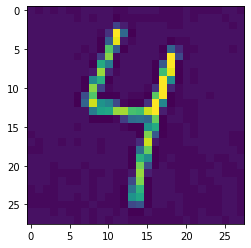

In [297]:
plt.imshow(image)

In [310]:
image = np.asarray(image).flatten()/255 * 0.99 + 0.00001

In [311]:
np.argmax(brain.predict(image))

4